# Predicción futura

🔮 PREDICCIONES FUTURAS AUTOMÁTICAS
📋 Configuración:
   Columna temporal: timestamp
   Variable objetivo: value
   ⚠️  Clave faltante 'test_r2', usando valor por defecto: 0.0
   ⚠️  Clave faltante 'test_rmse', usando valor por defecto: 0.0
   ⚠️  Clave faltante 'test_mape', usando valor por defecto: 0.0

🤖 MODELO CARGADO:
   Tipo: Linear Regression
   MAE en test: 26.55
   R² en test: 0.0000
   Features: 14
✅ Dataset procesado cargado desde: data/processed/industrial_timeseries_featured.csv
   Shape: (17352, 20)

📊 Datos históricos: (17352, 20)
   Último registro: 2023-12-31 23:00:00

🔮 CONFIGURACIÓN DE PREDICCIÓN:
   Períodos a predecir: 72
   Desde: 2024-01-01 00:00:00
   Hasta: 2024-01-03 23:00:00

🔄 GENERANDO PREDICCIONES...
   ⚠️  Features faltantes: {'temp_squared', 'demand_efficiency_interaction'}
   ℹ️  Rellenando con valores por defecto...


C:\Users\Marcos\AppData\Local\Temp\ipykernel_15760\2559485775.py:90: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_timestamps = pd.date_range(


   ✅ 24/72 predicciones completadas
   ✅ 48/72 predicciones completadas
   ✅ 72/72 predicciones completadas

📈 PREDICCIONES GENERADAS:
   Períodos: 72
   Valor mín predicho: 1403.60
   Valor máx predicho: 1525.73
   Valor promedio: 1465.50

🔍 PRIMERAS 10 PREDICCIONES:


,timestamp,predicted_value,temperature,demand_factor
0,2024-01-01 00:00:00,1525.730385,18.780078,0.749547
1,2024-01-01 01:00:00,1507.550604,20.545792,0.734201
2,2024-01-01 02:00:00,1501.452969,23.092137,0.721153
3,2024-01-01 03:00:00,1491.302830,22.626569,0.701618
4,2024-01-01 04:00:00,1499.167791,21.108178,0.747048
5,2024-01-01 05:00:00,1499.597585,24.177881,0.724324
6,2024-01-01 06:00:00,1502.360247,21.421020,0.748990
7,2024-01-01 07:00:00,1509.116233,21.255087,0.766581
8,2024-01-01 08:00:00,1489.964378,19.738086,0.682008
9,2024-01-01 09:00:00,1498.098562,24.902692,0.728890



📊 VISUALIZACIÓN DE PREDICCIONES:


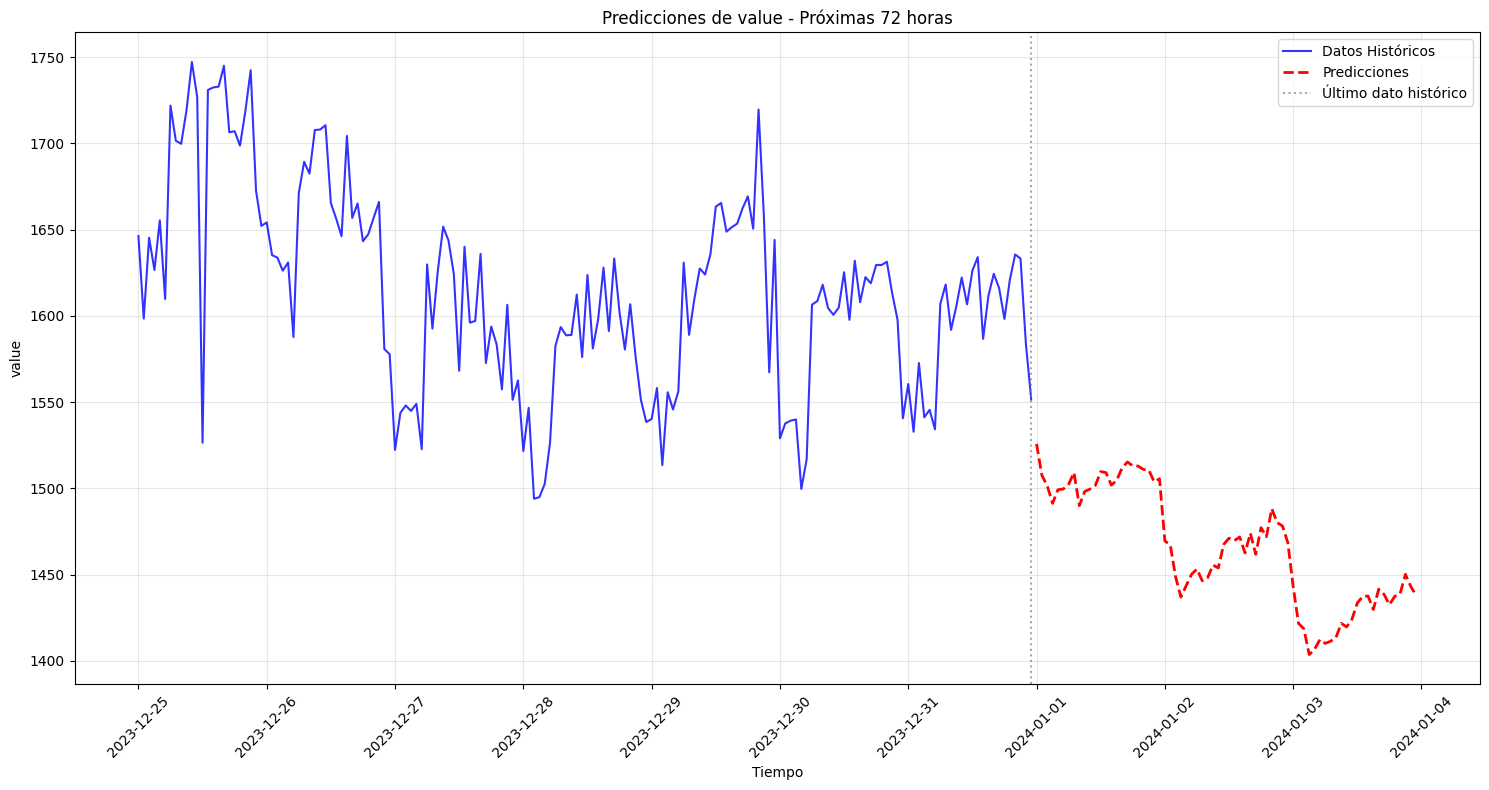


📋 ANÁLISIS POR PERÍODOS:
Estadísticas diarias:


,mean,min,max,std
date,,,,
2024-01-01,1505.61,1489.96,1525.73,7.87
2024-01-02,1463.17,1436.94,1488.21,13.21
2024-01-03,1427.70,1403.60,1450.14,13.42


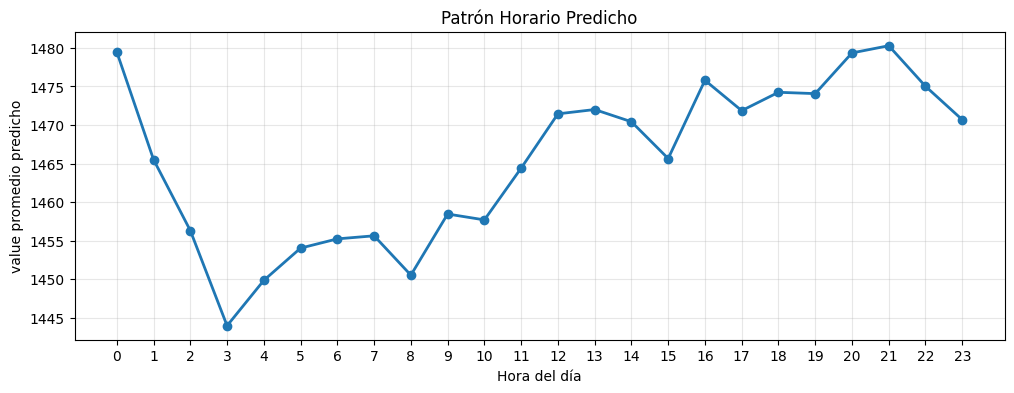


💾 Predicciones guardadas en: ../data/processed/future_predictions.csv

✅ PREDICCIONES FUTURAS COMPLETADAS
   Modelo: Linear Regression
   Períodos predichos: 72
   Rango temporal: 2024-01-01 00:00:00 a 2024-01-03 23:00:00

🔍 DEBUG - INFORMACIÓN DEL MODELO:
   Claves disponibles en model_info: ['features', 'model_type', 'test_mae', 'test_r2', 'test_rmse', 'test_mape']


In [2]:
# Predicciones Futuras - Automático

## Objetivo:
### ✔ Generar predicciones usando mejor modelo
### ✔ Simulación automática de features futuras
### ✔ Visualización de resultados

import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

from data_loader import load_processed
from config_loader import load_config
from features.feature_engineering import FeatureEngineeringEngine

print("🔮 PREDICCIONES FUTURAS AUTOMÁTICAS")
print("=" * 50)

# Cargar configuración
config = load_config("../config.yaml")  # ← AGREGAR RUTA RELATIVA
dataset_config = config.get('dataset', {})
datetime_col = dataset_config.get('datetime_col')
target_col = dataset_config.get('target_col')

print(f"📋 Configuración:")
print(f"   Columna temporal: {datetime_col}")
print(f"   Variable objetivo: {target_col}")

# Cargar modelo y metadatos
try:
    model = joblib.load("../models/best_model.pkl")
    
    # Función auxiliar para obtener métricas de manera segura
    def load_model_info_safe(path):
        """Carga model_info de manera segura, manejando claves faltantes."""
        try:
            info = joblib.load(path)
            # Verificar y agregar claves faltantes con valores por defecto
            default_keys = {
                'model_type': 'Unknown',
                'test_mae': 0.0,
                'test_r2': 0.0,
                'test_rmse': 0.0,
                'test_mape': 0.0,
                'features': []
            }
            
            for key, default_value in default_keys.items():
                if key not in info:
                    info[key] = default_value
                    print(f"   ⚠️  Clave faltante '{key}', usando valor por defecto: {default_value}")
            
            return info
        except Exception as e:
            print(f"   ❌ Error cargando model_info: {e}")
            return None
    
    model_info = load_model_info_safe("../models/model_info.pkl")
    
    if model_info:
        print(f"\n🤖 MODELO CARGADO:")
        print(f"   Tipo: {model_info['model_type']}")
        print(f"   MAE en test: {model_info['test_mae']:.2f}")
        print(f"   R² en test: {model_info['test_r2']:.4f}")
        print(f"   Features: {len(model_info['features'])}")
    else:
        raise Exception("No se pudo cargar la información del modelo")
    
except FileNotFoundError:
    print("❌ Error: Modelo no encontrado. Ejecuta primero el notebook 04_model.ipynb")
    raise
except Exception as e:
    print(f"❌ Error cargando modelo: {e}")
    raise

# Cargar datos históricos
df_historical = load_processed("../config.yaml")  # ← AGREGAR RUTA RELATIVA
print(f"\n📊 Datos históricos: {df_historical.shape}")
print(f"   Último registro: {df_historical[datetime_col].max()}")

# Configuración de predicción
forecast_hours = 72  # 3 días por defecto
last_timestamp = df_historical[datetime_col].max()
future_timestamps = pd.date_range(
    start=last_timestamp + timedelta(hours=1),
    periods=forecast_hours,
    freq='H'
)

print(f"\n🔮 CONFIGURACIÓN DE PREDICCIÓN:")
print(f"   Períodos a predecir: {forecast_hours}")
print(f"   Desde: {future_timestamps[0]}")
print(f"   Hasta: {future_timestamps[-1]}")

# Inicializar feature engineering
fe_engine = FeatureEngineeringEngine("../config.yaml")  # ← AGREGAR RUTA RELATIVA
raw_features = fe_engine.raw_features

# Función para simular features futuras
def simulate_future_features(timestamp, historical_data, raw_features):
    """
    Simula features futuras basadas en patrones históricos.
    En producción, estas vendrían de fuentes externas.
    """
    features = {}
    
    # Features temporales
    features['hour'] = timestamp.hour
    features['day_of_week'] = timestamp.dayofweek  
    features['month'] = timestamp.month
    features['quarter'] = timestamp.quarter
    features['is_weekend'] = 1 if timestamp.dayofweek >= 5 else 0
    
    # Simular features raw basadas en patrones históricos
    for feature in raw_features:
        if feature in historical_data.columns:
            # Obtener estadísticas históricas para este período
            same_hour = historical_data[historical_data[datetime_col].dt.hour == timestamp.hour]
            same_dow = historical_data[historical_data[datetime_col].dt.dayofweek == timestamp.dayofweek]
            
            if len(same_hour) > 0 and len(same_dow) > 0:
                # Combinar patrones horarios y semanales
                hour_mean = same_hour[feature].mean()
                dow_mean = same_dow[feature].mean()
                overall_mean = historical_data[feature].mean()
                overall_std = historical_data[feature].std()
                
                # Promedio ponderado + ruido
                simulated_value = (hour_mean * 0.4 + dow_mean * 0.4 + overall_mean * 0.2)
                simulated_value += np.random.normal(0, overall_std * 0.1)  # Pequeño ruido
                
                features[feature] = simulated_value
            else:
                # Fallback: usar media histórica con ruido
                mean_val = historical_data[feature].mean()
                std_val = historical_data[feature].std()
                features[feature] = mean_val + np.random.normal(0, std_val * 0.1)
    
    return features

# Generar predicciones futuras
print(f"\n🔄 GENERANDO PREDICCIONES...")

future_data = []
predictions = []

for i, ts in enumerate(future_timestamps):
    # Simular features básicas
    basic_features = simulate_future_features(ts, df_historical, raw_features)
    
    # Crear DataFrame temporal para aplicar feature engineering
    temp_row = {datetime_col: ts, target_col: 0}  # target temporal
    temp_row.update(basic_features)
    
    temp_df = pd.DataFrame([temp_row])
    
    # Para features de lag, usar valores históricos o predicciones anteriores
    if i == 0:
        # Primera predicción: usar datos históricos
        for lag_col in [col for col in model_info['features'] if 'lag_' in col]:
            if 'lag_1h' in lag_col:
                temp_df[lag_col] = df_historical[target_col].iloc[-1]
            elif 'lag_24h' in lag_col:
                temp_df[lag_col] = df_historical[target_col].iloc[-24] if len(df_historical) >= 24 else df_historical[target_col].iloc[-1]
            elif 'lag_48h' in lag_col:
                temp_df[lag_col] = df_historical[target_col].iloc[-48] if len(df_historical) >= 48 else df_historical[target_col].iloc[-1]
            elif 'lag_168h' in lag_col:
                temp_df[lag_col] = df_historical[target_col].iloc[-168] if len(df_historical) >= 168 else df_historical[target_col].iloc[-1]
    else:
        # Usar predicciones anteriores para lags
        for lag_col in [col for col in model_info['features'] if 'lag_' in col]:
            if 'lag_1h' in lag_col and i >= 1:
                temp_df[lag_col] = predictions[i-1]
            elif 'lag_24h' in lag_col and i >= 24:
                temp_df[lag_col] = predictions[i-24]
            elif 'lag_48h' in lag_col and i >= 48:
                temp_df[lag_col] = predictions[i-48]  
            elif 'lag_168h' in lag_col and i >= 168:
                temp_df[lag_col] = predictions[i-168]
            else:
                # Usar último valor histórico disponible
                temp_df[lag_col] = df_historical[target_col].iloc[-1]
    
    # Para rolling features, combinar históricos + predicciones
    for rolling_col in [col for col in model_info['features'] if 'rolling_' in col]:
        if 'rolling_mean_24h' in rolling_col:
            if i < 24:
                # Combinar datos históricos con predicciones
                recent_values = list(df_historical[target_col].tail(24-i)) + predictions[:i]
            else:
                recent_values = predictions[i-24:i]
            temp_df[rolling_col] = np.mean(recent_values) if recent_values else df_historical[target_col].mean()
            
        elif 'rolling_std_24h' in rolling_col:
            if i < 24:
                recent_values = list(df_historical[target_col].tail(24-i)) + predictions[:i]
            else:
                recent_values = predictions[i-24:i]
            temp_df[rolling_col] = np.std(recent_values) if len(recent_values) > 1 else df_historical[target_col].std()
    
    # Crear features de interacción y términos cuadráticos
    # (Esto se podría hacer aplicando el FeatureEngineeringEngine, pero es más simple replicar la lógica)
    for col in model_info['features']:
        if '_squared' in col:
            base_col = col.replace('_squared', '')
            if base_col in temp_df.columns:
                temp_df[col] = temp_df[base_col] ** 2
        elif '_interaction' in col:
            # Manejar interacciones (asumiendo formato col1_col2_interaction)
            if 'demand_factor_operational_efficiency_interaction' == col:
                if 'demand_factor' in temp_df.columns and 'operational_efficiency' in temp_df.columns:
                    temp_df[col] = temp_df['demand_factor'] * temp_df['operational_efficiency']
            elif 'temperature_demand_factor_interaction' == col:
                if 'temperature' in temp_df.columns and 'demand_factor' in temp_df.columns:
                    temp_df[col] = temp_df['temperature'] * temp_df['demand_factor']
    
    # Verificar que todas las features necesarias están presentes
    missing_features = set(model_info['features']) - set(temp_df.columns)
    if missing_features:
        # Solo mostrar advertencia la primera vez
        if i == 0:
            print(f"   ⚠️  Features faltantes: {missing_features}")
            print(f"   ℹ️  Rellenando con valores por defecto...")
        
        # Rellenar con valores por defecto
        for feature in missing_features:
            if 'lag_' in feature:
                temp_df[feature] = df_historical[target_col].mean()
            elif 'rolling_mean' in feature:
                temp_df[feature] = df_historical[target_col].mean()
            elif 'rolling_std' in feature:
                temp_df[feature] = df_historical[target_col].std()
            elif '_squared' in feature:
                temp_df[feature] = 0
            elif '_interaction' in feature:
                temp_df[feature] = 0.5
            else:
                temp_df[feature] = 0
    
    # Preparar features para predicción
    X_pred = temp_df[model_info['features']]
    
    # Realizar predicción
    pred = model.predict(X_pred)[0]
    predictions.append(pred)
    
    # Guardar datos para análisis
    row_data = basic_features.copy()
    row_data[datetime_col] = ts
    row_data['predicted_value'] = pred
    future_data.append(row_data)
    
    if (i + 1) % 24 == 0:
        print(f"   ✅ {i + 1}/{forecast_hours} predicciones completadas")

# Convertir a DataFrame
future_df = pd.DataFrame(future_data)

print(f"\n📈 PREDICCIONES GENERADAS:")
print(f"   Períodos: {len(future_df)}")
print(f"   Valor mín predicho: {future_df['predicted_value'].min():.2f}")
print(f"   Valor máx predicho: {future_df['predicted_value'].max():.2f}")
print(f"   Valor promedio: {future_df['predicted_value'].mean():.2f}")

# Mostrar primeras predicciones
print(f"\n🔍 PRIMERAS 10 PREDICCIONES:")
display_cols = [datetime_col, 'predicted_value'] + raw_features[:2]
display_cols = [col for col in display_cols if col in future_df.columns]
display(future_df[display_cols].head(10))

# Visualización
print(f"\n📊 VISUALIZACIÓN DE PREDICCIONES:")

plt.figure(figsize=(15, 8))

# Datos históricos (última semana)
historical_window = 168  # 1 semana
df_recent = df_historical.tail(historical_window)

plt.plot(df_recent[datetime_col], df_recent[target_col], 
         label='Datos Históricos', color='blue', linewidth=1.5, alpha=0.8)

# Predicciones futuras  
plt.plot(future_df[datetime_col], future_df['predicted_value'], 
         label='Predicciones', color='red', linestyle='--', linewidth=2)

# Línea divisoria
plt.axvline(x=df_historical[datetime_col].max(), color='gray', linestyle=':', 
            label='Último dato histórico', alpha=0.7)

plt.title(f'Predicciones de {target_col} - Próximas {forecast_hours} horas')
plt.xlabel('Tiempo')
plt.ylabel(target_col)
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis por períodos
print(f"\n📋 ANÁLISIS POR PERÍODOS:")

# Agrupar por días
future_df['date'] = pd.to_datetime(future_df[datetime_col]).dt.date
daily_stats = future_df.groupby('date')['predicted_value'].agg(['mean', 'min', 'max', 'std']).round(2)

print("Estadísticas diarias:")
display(daily_stats)

# Patrón horario predicho
hourly_pattern = future_df.groupby(future_df[datetime_col].dt.hour)['predicted_value'].mean()

plt.figure(figsize=(12, 4))
plt.plot(hourly_pattern.index, hourly_pattern.values, marker='o', linewidth=2)
plt.title('Patrón Horario Predicho')
plt.xlabel('Hora del día')
plt.ylabel(f'{target_col} promedio predicho')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

# Guardar predicciones
output_path = "data/processed/future_predictions.csv"
try:
    # Intentar guardar en diferentes ubicaciones
    for prefix in ["../", "../../", ""]:
        try:
            full_path = prefix + output_path
            os.makedirs(os.path.dirname(full_path), exist_ok=True)
            future_df.to_csv(full_path, index=False)
            print(f"\n💾 Predicciones guardadas en: {full_path}")
            break
        except:
            continue
except:
    print(f"\n⚠️  No se pudieron guardar las predicciones automáticamente")

print(f"\n✅ PREDICCIONES FUTURAS COMPLETADAS")
print(f"   Modelo: {model_info['model_type']}")
print(f"   Períodos predichos: {len(future_df)}")
print(f"   Rango temporal: {future_df[datetime_col].min()} a {future_df[datetime_col].max()}")

# Información del modelo para debug
print(f"\n🔍 DEBUG - INFORMACIÓN DEL MODELO:")
print(f"   Claves disponibles en model_info: {list(model_info.keys())}")